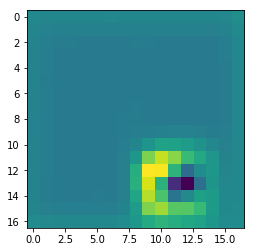

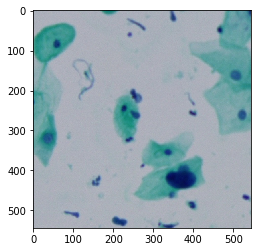

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import torch
from tensorflow.python.platform import gfile
import os
import json
from tqdm import tqdm_notebook
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import numpy as np
%matplotlib inline
from glob import glob


with tf.Graph().as_default() as graph:
    with tf.Session(graph=graph) as sess:
        tf.global_variables_initializer().run()
        with gfile.FastGFile('/hdd/sd5/tlc/TCT/Model_pb/res18_epoch=0.pb', 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())
            tf.import_graph_def(graph_def, name='') # 导入计算图
            input_ = sess.graph.get_tensor_by_name('input:0')
            trainable = sess.graph.get_tensor_by_name('trainable:0')
            prob = sess.graph.get_tensor_by_name('fc_layer/op_to_store:0')
            cam = sess.graph.get_tensor_by_name('cam:0')
            img = np.load('/hdd/sd2/data/TCT/densenet/data/all_data/QL_data/label_smoothing_data/train/6_cut_pos/TASK_1041_20191202152914_1f0399cbb1a06cb161fea8422d17e8c3d880363d_424_4.npy')
            img = img/255.
            input_data = img[np.newaxis, ...]
            res, cam = sess.run([prob, cam], feed_dict={input_:input_data, trainable:False})
            plt.imshow(cam[0])
            plt.show()
            plt.imshow(img)
            plt.show()
            

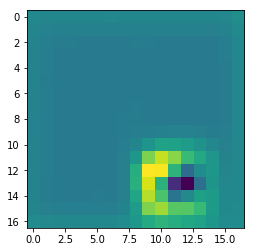

In [5]:
plt.imshow(cam[0])